APRIORI

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Load the dataset from the provided URL
data = pd.read_csv("./dataset_ys.csv")

# Process the DATE column (e.g., extract the year)
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year

# Define the binning function for numerical columns
def binning(x, column):
    median = data[column].median()
    if x <= median:
        return 'low'
    elif x > median and x <= data[column].quantile(0.75):
        return 'medium'
    else:
        return 'high'

numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for column in numeric_columns:
    data[column] = data.apply(lambda row: binning(row[column], column), axis=1)

# Create a new DataFrame for transactions
transaction_data = data[['Year', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

# One-hot encode the data
transaction_data = pd.get_dummies(transaction_data, columns=['Year', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])

# Ensure that the transaction data contains only 0s and 1s
transaction_data[transaction_data > 0] = 1

# Use Apriori to mine association rules
frequent_itemsets = apriori(transaction_data, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Print the association rules
print(rules)



C:\Users\subasini\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


           antecedents                                        consequents  \
0          (Year_2018)                                         (Open_low)   
1           (Open_low)                                        (Year_2018)   
2          (Year_2018)                                         (High_low)   
3           (High_low)                                        (Year_2018)   
4          (Year_2018)                                          (Low_low)   
...                ...                                                ...   
32733  (Volume_medium)  (Year_2023, Adj Close_low, Low_low, Close_low,...   
32734        (Low_low)  (Year_2023, Adj Close_low, Volume_medium, Clos...   
32735      (Close_low)  (Year_2023, Adj Close_low, Volume_medium, Low_...   
32736       (Open_low)  (Year_2023, Adj Close_low, Volume_medium, Low_...   
32737       (High_low)  (Year_2023, Adj Close_low, Volume_medium, Low_...   

       antecedent support  consequent support   support  confidence      li

DESCRIPTIVE ANALYSIS

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("./dataset_ys.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume,Class
0,01/11/2018,44.500000,51.250000,44.130001,50.709999,49.095387,31687200,1
1,01/11/2018,1624.500000,1798.300049,1583.550049,1754.000000,1626.050049,23176010,3
2,01/12/2018,50.735001,52.250000,47.029999,51.794998,50.145844,34916200,1
3,01/12/2018,1769.500000,1869.500000,1741.250000,1819.650024,1686.911499,36351903,3
4,01/01/2019,51.384998,52.049999,47.250000,49.110001,47.546333,30743400,1
...,...,...,...,...,...,...,...,...
129,01/10/2023,59.099998,59.580002,57.310001,58.869999,58.869999,10797900,1
130,01/10/2023,13340.000000,13480.000000,12860.000000,13380.000000,13380.000000,212100,2
131,01/10/2023,2465.600098,2524.800049,2461.800049,2511.300049,2511.300049,7635002,3
132,09/10/2023,58.250000,58.900002,58.139999,58.869999,58.869999,1110230,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       134 non-null    object 
 1   Open       134 non-null    float64
 2   High       134 non-null    float64
 3   Low        134 non-null    float64
 4   Close      134 non-null    float64
 5   Adj Close  134 non-null    float64
 6   Volume     134 non-null    int64  
 7   Class      134 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 8.5+ KB


In [5]:
pd.isnull(data).sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Class        0
dtype: int64

In [6]:
sorted_df = data.sort_values('Volume', ascending = True).head(10)
sorted_df

,Date,Open,High,Low,Close,Adj Close,Volume,Class
133,10/10/2023,13380.00,13610.000000,13350.000000,13580.000000,13580.000000,28000,2
130,01/10/2023,13340.00,13480.000000,12860.000000,13380.000000,13380.000000,212100,2
127,01/09/2023,12210.00,13940.000000,12200.000000,13220.000000,13220.000000,1094200,2
132,09/10/2023,58.25,58.900002,58.139999,58.869999,58.869999,1110230,1
124,01/08/2023,12880.00,13310.000000,11610.000000,12290.000000,12290.000000,1192600,2
109,01/03/2023,13560.00,13740.000000,12230.000000,13160.000000,13004.290040,1241800,2
106,01/02/2023,12850.00,13830.000000,12410.000000,13640.000000,13478.610350,1444900,2
112,01/04/2023,13250.00,14680.000000,12480.000000,13770.000000,13770.000000,1551700,2
100,01/12/2022,14730.00,14910.000000,12750.000000,13280.000000,13122.870120,1572100,2
121,01/07/2023,13340.00,13470.000000,12070.000000,12880.000000,12880.000000,1585000,2


In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,134.0,2.341705e+03,3.825695e+03,36.540001,6.324000e+01,1.766375e+03,2.389250e+03,1.532000e+04
High,134.0,2.462813e+03,4.033283e+03,42.320000,6.800250e+01,1.835900e+03,2.521950e+03,1.594000e+04
Low,134.0,2.193286e+03,3.530721e+03,29.500000,6.089000e+01,1.714000e+03,2.313500e+03,1.335000e+04
Close,134.0,2.326184e+03,3.765103e+03,38.459999,6.243250e+01,1.775425e+03,2.394837e+03,1.453000e+04
Adj Close,134.0,2.281231e+03,3.749855e+03,37.497852,6.187550e+01,1.645912e+03,2.298870e+03,1.435808e+04
Volume,134.0,3.481123e+07,3.033881e+07,28000.000000,2.583643e+07,3.152765e+07,3.928382e+07,3.184869e+08
Class,134.0,1.992537e+00,9.537916e-01,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00


In [8]:
most_volume = data.query('Volume>1500000', inplace = False).sort_values('Volume', ascending = False)
most_volume[:10]

,Date,Open,High,Low,Close,Adj Close,Volume,Class
37,01/05/2020,2195.000000,2195.000000,1902.000000,2057.350098,1931.041260,318486932,3
32,01/03/2020,53.740002,55.349998,29.500000,38.459999,37.497852,108451000,1
35,01/04/2020,2293.199951,2614.300049,2127.949951,2195.000000,2060.240479,104215304,3
39,01/06/2020,2075.000000,2199.949951,2054.050049,2180.000000,2046.161377,77558947,3
36,01/05/2020,42.250000,42.320000,35.650002,41.830002,40.783554,77455600,1
33,01/03/2020,2190.000000,2313.000000,1757.300049,2298.500000,2157.385742,67398186,3
41,01/07/2020,2183.000000,2350.000000,2125.000000,2209.899902,2088.381836,65932610,3
81,01/03/2022,2172.100098,2172.100098,1901.550049,2048.649902,1983.134399,59675399,3
34,01/04/2020,36.540001,44.919998,33.860001,43.349998,42.265522,58633700,1
80,01/03/2022,61.990002,63.560001,54.250000,61.330002,60.006428,55201000,1


In [9]:
data[["High"]].iloc[18]

High    58.105
Name: 18, dtype: float64

In [10]:
data[["Low"]].iloc[10]

Low    55.900002
Name: 10, dtype: float64

C:\Users\subasini\AppData\Local\Temp\ipykernel_11596\327981933.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.High)


<Axes: xlabel='High', ylabel='Density'>

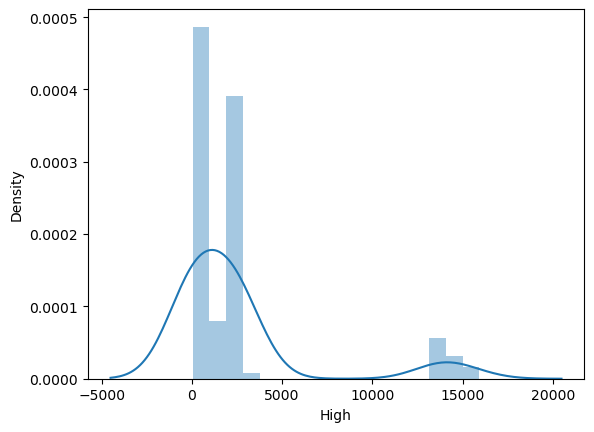

In [11]:
sns.distplot(data.High)

<Axes: >

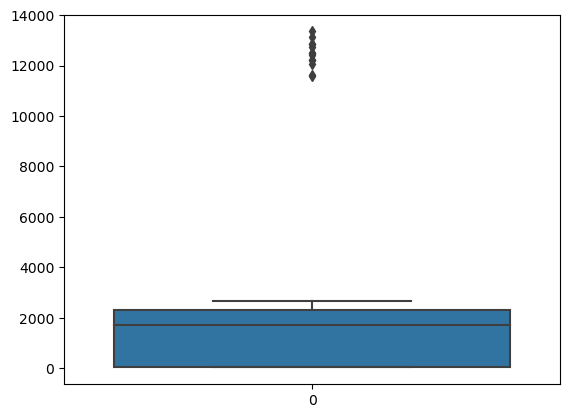

In [12]:
sns.boxplot(data.Low)

<Axes: >

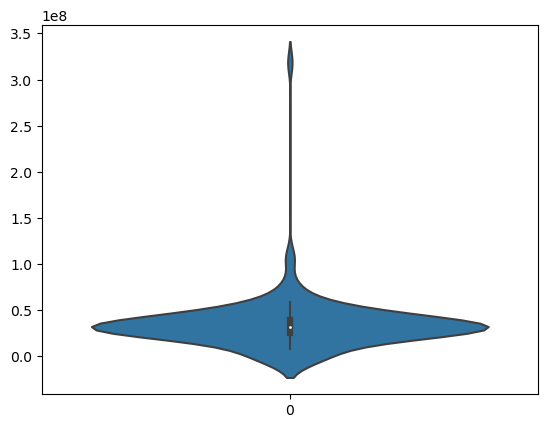

In [13]:
sns.violinplot(data.Volume)

C:\Users\subasini\AppData\Local\Temp\ipykernel_11596\3731019888.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

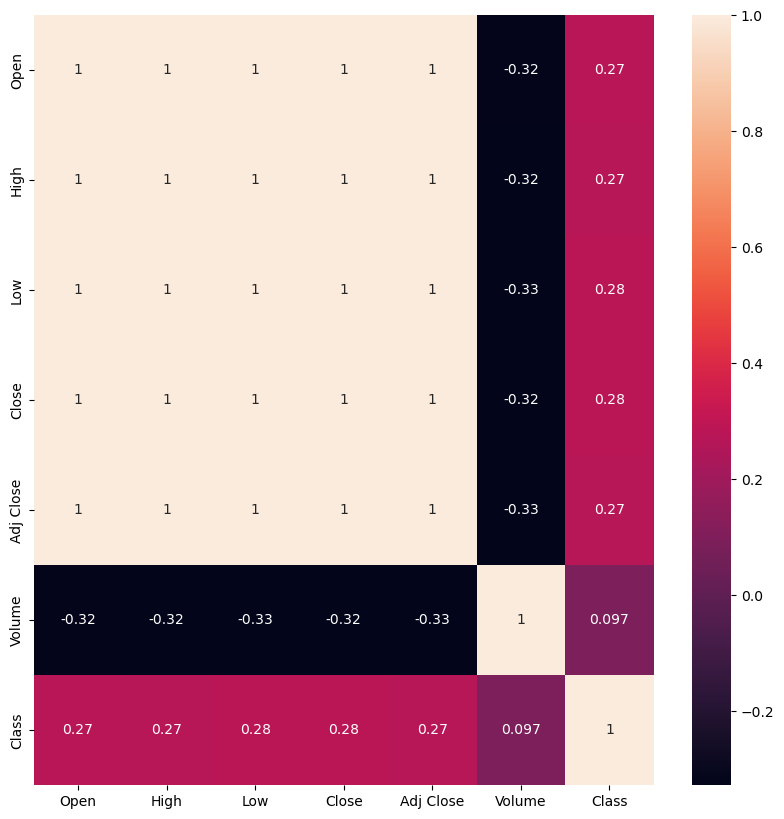

In [14]:
plt.figure(figsize=(10,10))

sns.heatmap(data.corr(), annot=True)

[Text(0.5, 1.0, 'High vs Volume')]

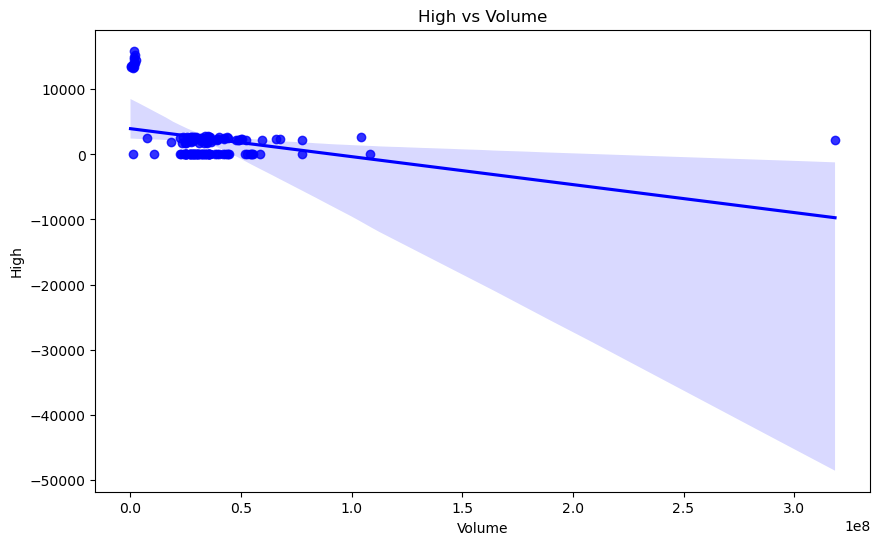

In [15]:
plt.figure(figsize=(10,6))
sns.regplot(data = data, y = "High", x ="Volume", color = "b").set(title = "High vs Volume")

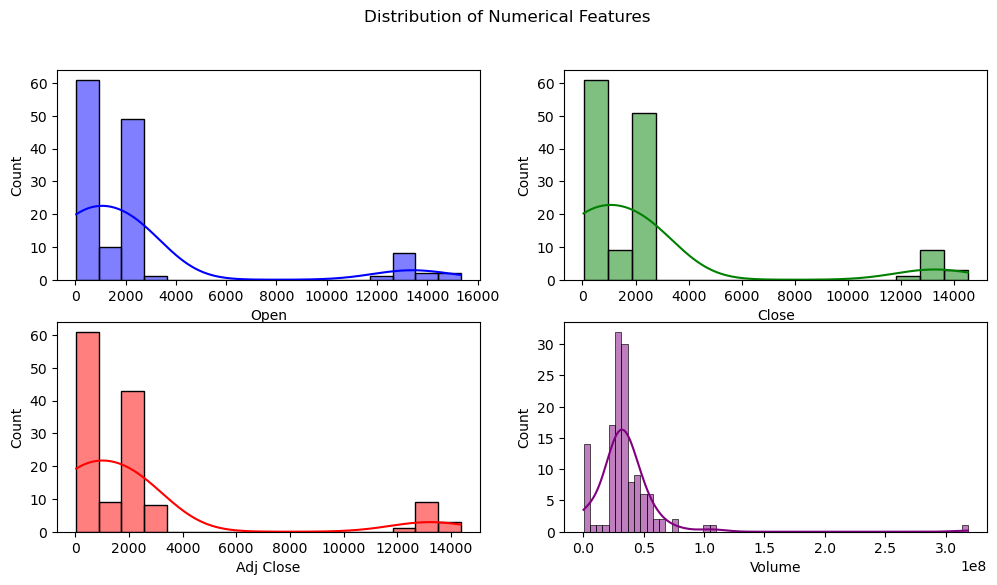

In [16]:
# Distribution of numerical features (histograms)
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(data['Open'], kde=True, color='b')
plt.subplot(2, 2, 2)
sns.histplot(data['Close'], kde=True, color='g')
plt.subplot(2, 2, 3)
sns.histplot(data['Adj Close'], kde=True, color='r')
plt.subplot(2, 2, 4)
sns.histplot(data['Volume'], kde=True, color='purple')
plt.suptitle("Distribution of Numerical Features")
plt.show()

PREDICTIVE ANALYSIS

Mean Squared Error: 41191.3886849842


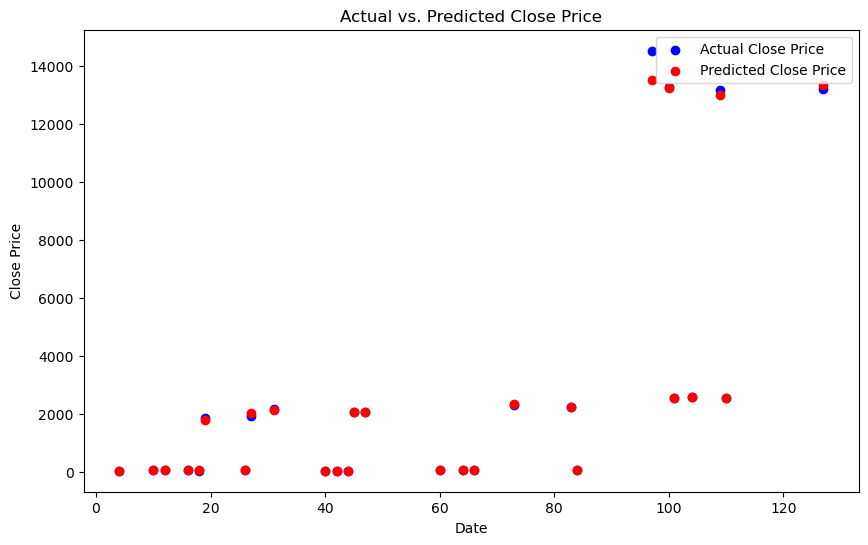

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset from the provided URL
data = pd.read_csv("./dataset_ys.csv")

# Process the DATE column (e.g., extract the year)
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year

data = data.drop(['Date'], axis=1)

# Prepare the target variable (Close price) and features
target = data['Close']
features = data.drop(['Close'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualize the predicted vs. actual stock prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, y_test, label='Actual Close Price', color='blue')
plt.scatter(y_test.index, y_pred, label='Predicted Close Price', color='red')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Price')
plt.show()



CLASSIFICATION


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00        10

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27

Confusion Matrix:
[[13  0  0]
 [ 0  4  0]
 [ 0  0 10]]


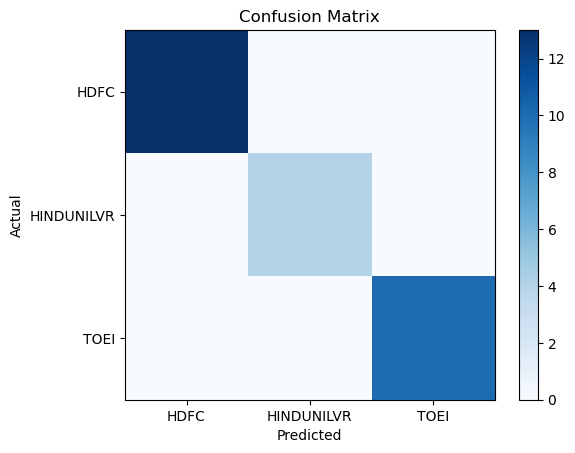

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

target = data['Class']
features = data.drop(['Class'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classification model
print(classification_report(y_test, y_pred))
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

# Visualize the confusion matrix
plt.imshow(confusion, cmap='Blues', interpolation='none')
plt.colorbar()
plt.xticks([0, 1, 2], ['HDFC', 'HINDUNILVR', 'TOEI'])
plt.yticks([0, 1, 2], ['HDFC', 'HINDUNILVR', 'TOEI'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

PREDICTION BY INPUT

In [19]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree Classifier
X = data.drop('Class', axis=1)
y = data['Class']
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X, y)

# Prompt the user for input features
user_input = {}
for feature in X.columns:
    # Ensure that the user enters numerical values
    while True:
        try:
            value = float(input(f"Enter the value for {feature}: "))
            user_input[feature] = value
            break  # Exit the loop if the input is valid
        except ValueError:
            print("Please enter a numerical value for the feature.")

# Create a DataFrame with the user's input
user_df = pd.DataFrame([user_input])

# Use the trained model to predict the class
predicted_class = classifier.predict(user_df)[0]
print(f"Predicted Class (Company): {predicted_class}")


Predicted Class (Company): 2


STOCK_OF_COMPANIES

In [19]:
import pandas as pd
TOEI=pd.read_csv('./4816.T.csv')
HINDUNILVR=pd.read_csv("./HINDUNILVR.NS.csv")
HDFC=pd.read_csv("./HDB.csv")
DATA=pd.read_csv("./dataset_ys.csv")
company_list = [TOEI,HINDUNILVR,HDFC,DATA]

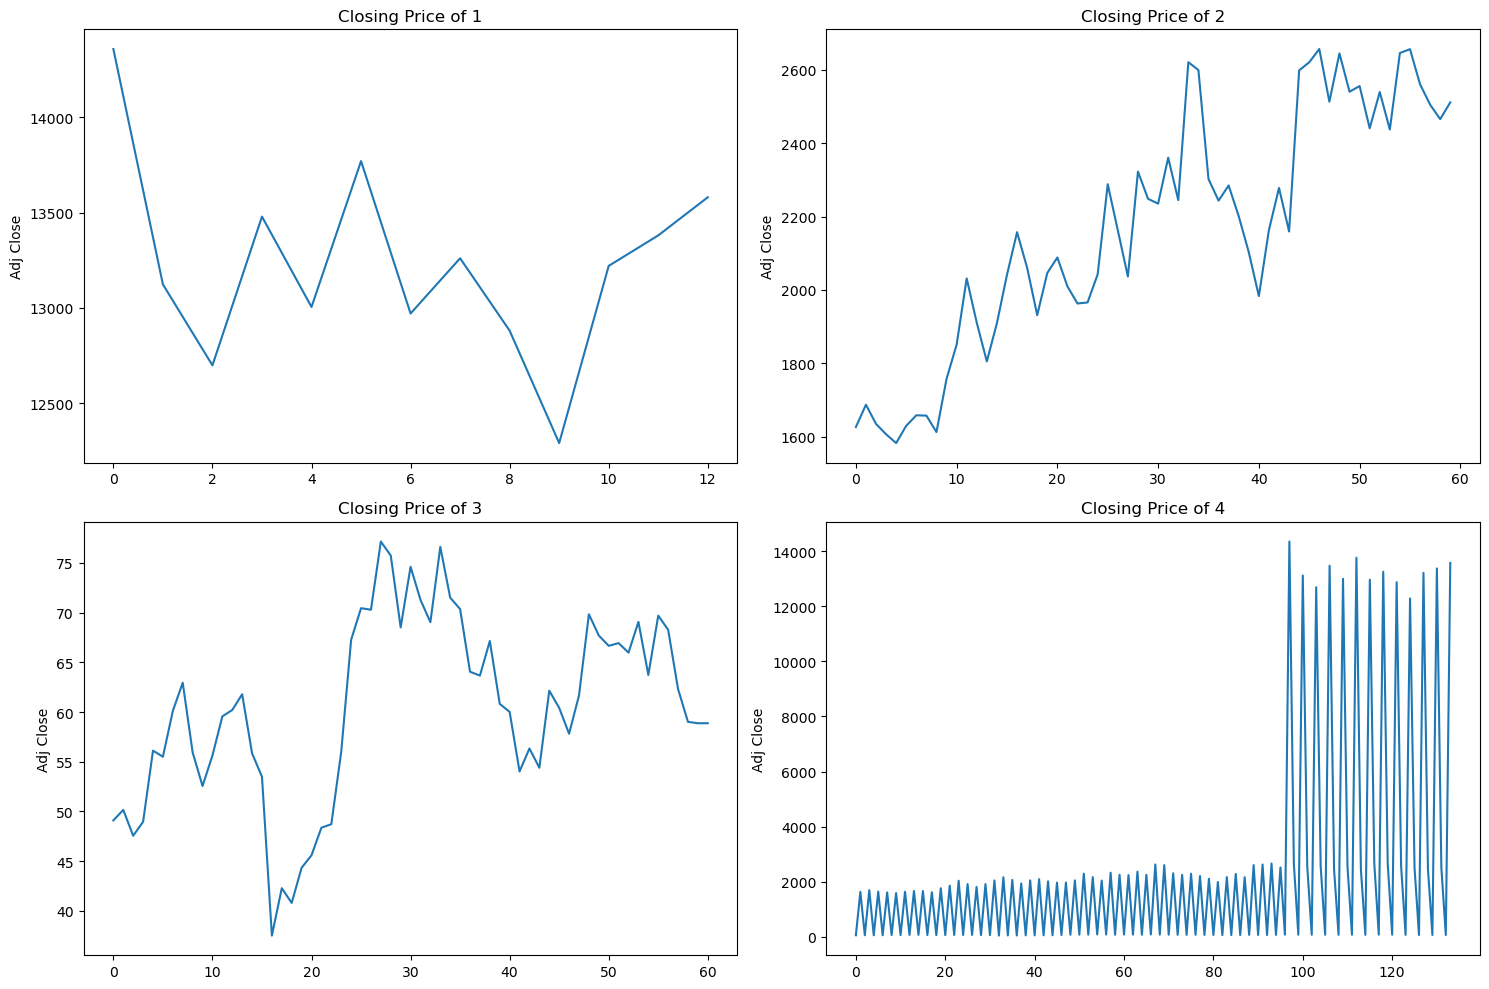

In [20]:
import matplotlib.pyplot as plt
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list,1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {i}")
    
plt.tight_layout()

DAILY_RETURNS

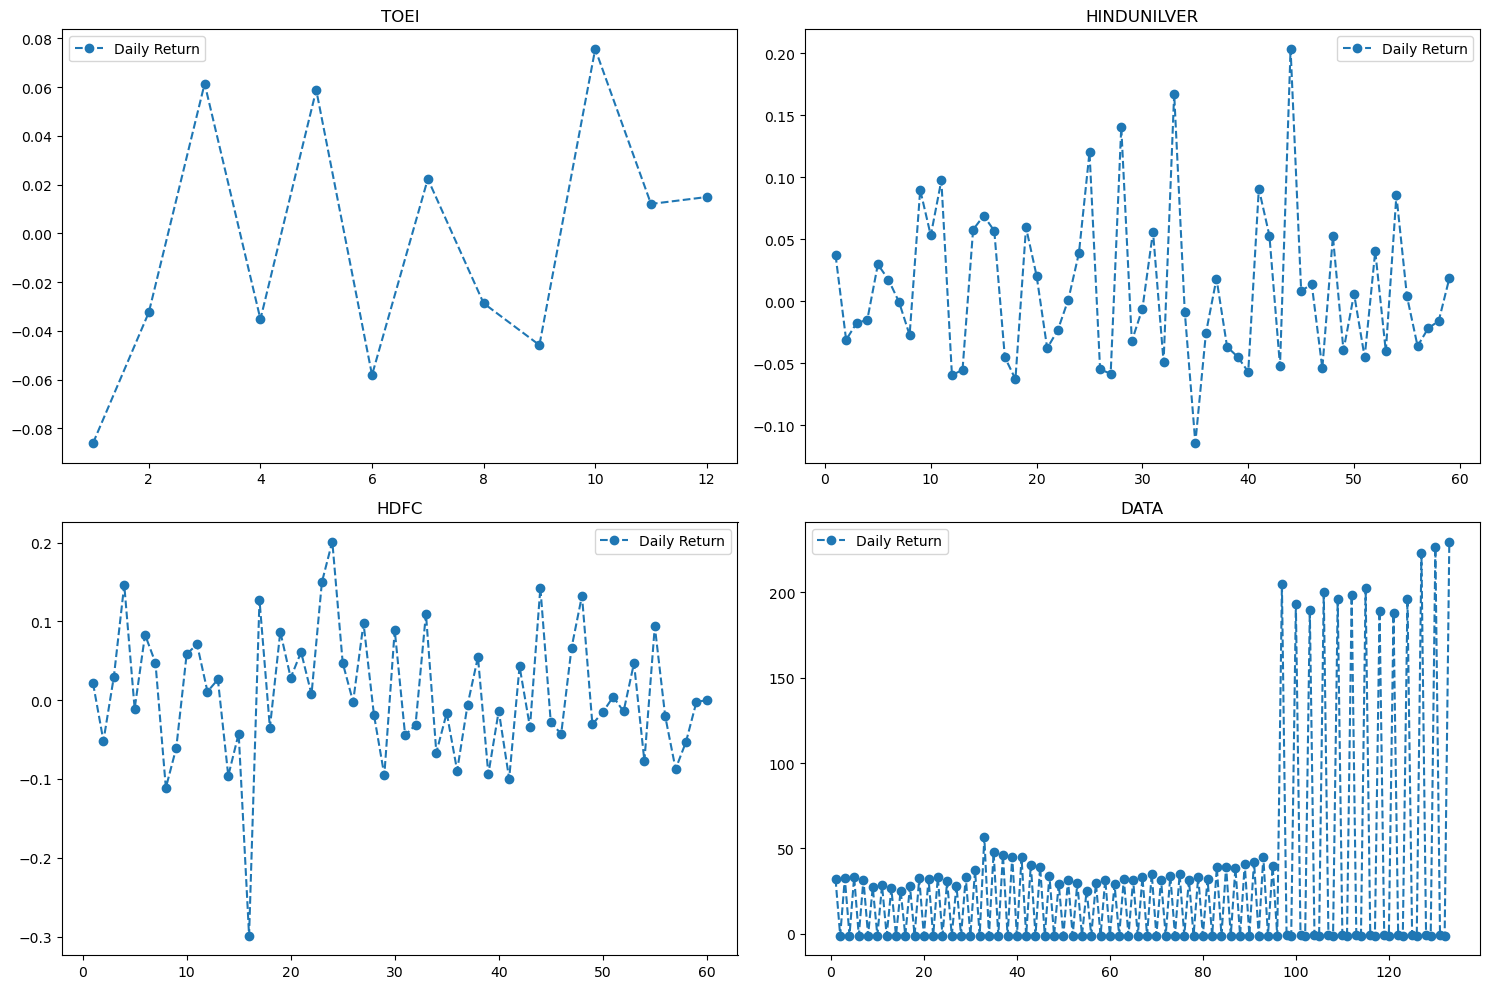

In [21]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

TOEI['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('TOEI')

HINDUNILVR['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('HINDUNILVER')

HDFC['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('HDFC')

DATA['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('DATA')

fig.tight_layout()

Predicting the closing price stock price of HDB

In [16]:
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

In [17]:
yf.pdr_override()

In [18]:
tech_list = ['HINDUNILVR.NS','HDB','4816.T']

In [19]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [20]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  3 of 3 completed


,4816.T,HDB,HINDUNILVR.NS
Date,,,
2022-10-13,NaN,NaN,NaN
2022-10-14,0.041964,0.005551,0.003663
2022-10-17,0.007599,0.033983,0.005726
2022-10-18,0.028658,0.005672,0.004516
2022-10-19,0.000000,-0.009290,-0.007397


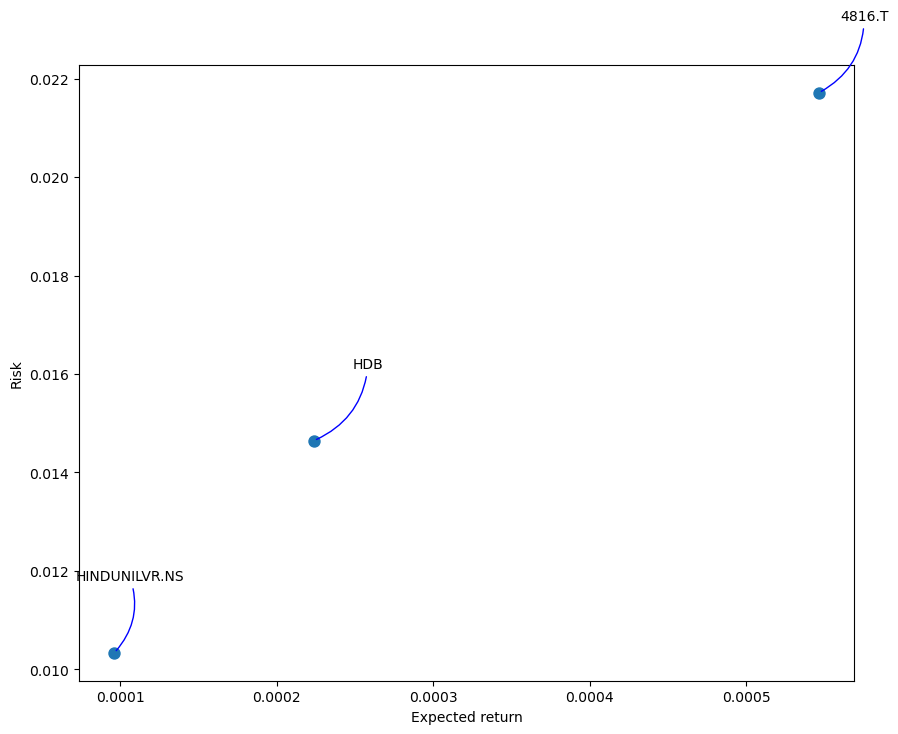

In [23]:
import numpy as np
import matplotlib.pyplot as plt

rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))